## 0. 课程大纲

### 0.1 直方图阈值
```python
plt.hist(img.ravel(), 256, [0,256])
cv.threshold(img, th, 255, cv.THRESH_BINARY)
```

### 0.2 三角法阈值
```python
th, img_bin = cv.threshold(img, th, 255, cv.THRESH_TRIANGLE)
```

### 0.3 迭代法阈值

### 0.4 大津法阈值
```python
th, img_bin = cv.threshold(img, th, 255, cv.THRESH_OTSU)
```

### 0.5 自适应阈值分割
```python
img_adapt = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C,
                                 cv.THRESH_BINARY, 77, 0)
```

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def show(img):
    if img.ndim == 2:
        plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    else:
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        plt.imshow(img)
    plt.show()

## 6. 阈值分割

### 6.1 直方图阈值

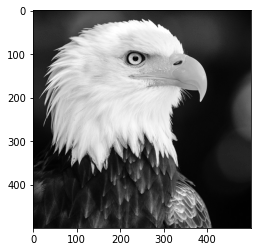

In [10]:
img = cv.imread('pic/eagle500x500.jpg', 0)
show(img)

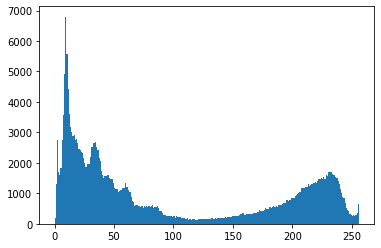

In [8]:
plt.hist(img.ravel(), 256, [0, 256])
plt.show()

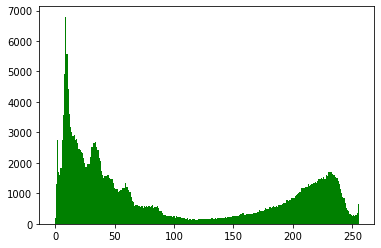

In [11]:
plt.hist(img.flatten(), bins=np.arange(-0.5, 256, 1), color='green')
plt.show()

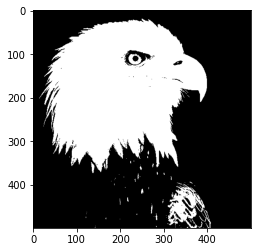

In [12]:
_, img_bin = cv.threshold(img, 125, 255, cv.THRESH_BINARY)
show(img_bin)

### 6.2 三角法阈值

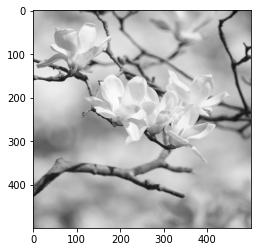

True

In [21]:
# img = cv.imread('pic/eagle500x500.jpg', 0)
img = cv.imread('pic/blossom500x500.jpg', 0)
show(img)

cv.imwrite('pic/blossom_gray.jpg', img)

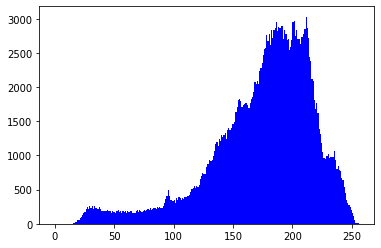

In [20]:
plt.hist(img.ravel(), 256, [0,256], color='blue')
plt.show()

In [ ]:
th, img_bin = cv.threshold(img, -1, 255, cv.THRESH_TRIANGLE)


print(th)
show(np.hstack([img, img_bin]))

### 6.3 大津法阈值分割（OSTU）

120.0


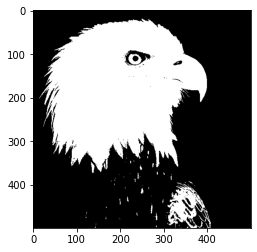

In [15]:
th, img_bin = cv.threshold(img, 0, 255, cv.THRESH_OTSU)
print(th)
show(img_bin)

In [16]:
cv.imwrite('pic/eagle_threshold.jpg', np.hstack([img, img_bin]))

True

### 6.4 自适应阈值分割

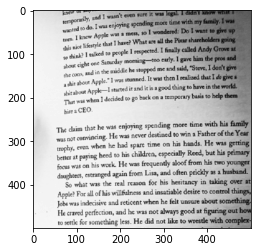

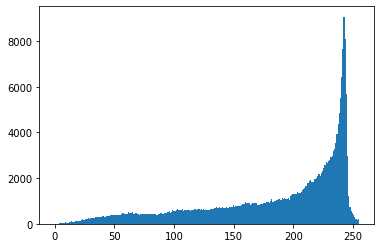

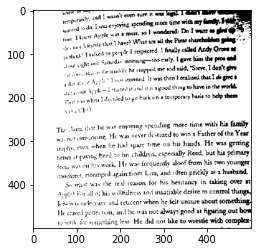

In [24]:
# 固定阈值
img = cv.imread('pic/text500x500.jpg', 0)
show(img)

plt.hist(img.ravel(), bins=256)
plt.show()

_, img_thres = cv.threshold(img, 100, 255, cv.THRESH_BINARY)
show(img_thres)

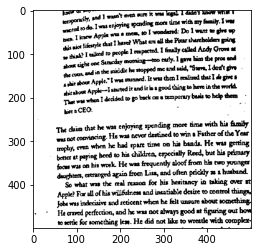

In [32]:
img_adapt = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C,
                cv.THRESH_BINARY, 21, 12)
show(img_adapt)

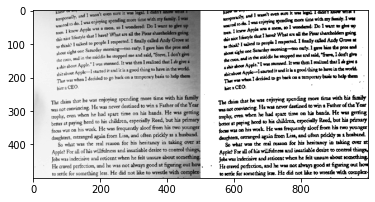

In [33]:
img_adapt = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C,
                cv.THRESH_BINARY, 21, 12)
show(np.hstack([img, img_adapt]))

In [51]:
cv.imwrite('pic/text_threshold.jpg', np.hstack([img, img_thres, img_adapt]))

True

## 6.4* 自适应阈值分割实现

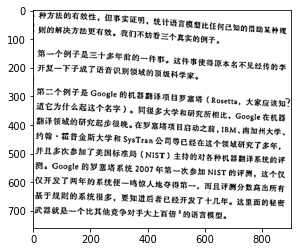

In [21]:
img = cv.imread('pic/page760x900.jpg', 0)

winSize = 21

img_blur = cv.blur(img, (winSize, winSize))
img_bin = (np.float32(img_blur) - np.float32(img) < 8).astype(np.uint8) * 255

show(img_bin)

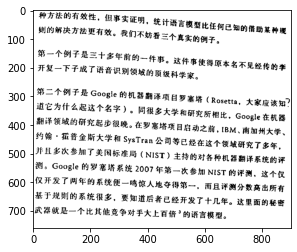

In [22]:
img = cv.imread('pic/page760x900.jpg', 0)

winSize = 31
ratio = 0.15

img_blur = cv.blur(img, (winSize, winSize))
thresh = (1 - ratio) * img_blur

img[img < thresh] = 0
img[img >= thresh] = 255
show(img)

### 6.5* 大津法实现

对于给定的阈值$T$，可以将图像分为目标和背景。其中背景点数占图像比例为 $p_0$，平均灰度值为 $m_0$。而目标点数占图像比例为 $p_1$，平均灰度值为 $m_1$，其中满足
$$
p_0 + p_1 = 1
$$
整幅图像的平均灰度值为常数，跟阈值无关，且为
$$
\overline m = p_0m_0 + p_1m_1
$$
类间方差为
$$
\sigma^2 = p_0(m_0 - \overline m)^2 + p_1(m_1 - \overline m)^2
$$
代入 $p_0 + p_1 = 1$ 和 $\overline m$，可化简为
$$
\sigma^2 = p_0p_1(m_0 - m_1)^2
$$
遍历灰度值，找出能使 $\sigma^2$ 最大的值。

In [20]:
img = cv.imread('pic/eagle500x500.jpg', 0)

T = 1
Sigma = 0

for t in range(0, 255):
    bg = img[img <= t]
    obj = img[img > t]
    
    p0 = bg.size / img.size
    p1 = obj.size / img.size
    
    m0 = 0 if bg.size == 0  else bg.mean()
    m1 = 0 if obj.size == 0 else obj.mean()
    
    sigma = p0 * p1 * (m0 - m1)**2
    
    if sigma > Sigma:
        T = t
        Sigma = sigma
        
print(T)

120


## 6.6* 迭代法阈值分割

Best threshold = 120


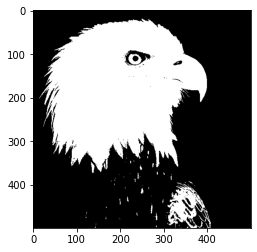

In [12]:
img = cv.imread('pic/eagle500x500.jpg', 0)

T = img.mean()

while True:
    t1 = img[img > T].mean()
    t2 = img[img <= T].mean()
    t  = (t1 + t2) / 2
    if abs(t - T) < 1:
        break
    T = t
T = int(T)

print(f'Best threshold = {T}')
_, img_bin = cv.threshold(img, T, 255, cv.THRESH_BINARY)
show(img_bin)

In [9]:
cv.imwrite('test/eagle_iterative.jpg', np.hstack([img, img_bin, img_bin2]))

True

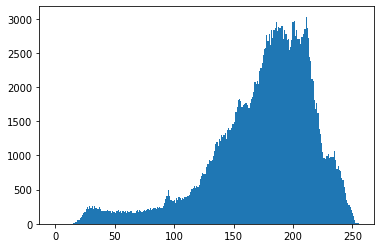

In [40]:
img = cv.imread('pic/blossom500x500.jpg', 0)

plt.hist(img.flatten(), bins=np.arange(-0.5, 256, 1))
plt.show()

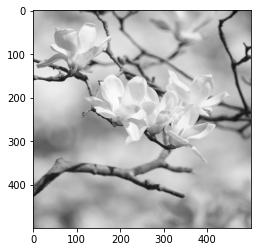

In [41]:
show(img)

112.0


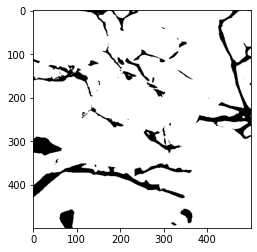

In [42]:
thresh, img_bin = cv.threshold(img, 0, 255, cv.THRESH_TRIANGLE)
print(thresh)
show(img_bin)